In [335]:
# TODO: Find time complexities and exact time of solution methods

In [337]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

import numpy as np
from numpy.random import default_rng
rng = default_rng(257) # seed

# Task 1

In [339]:
# define matrix sizes
N = 500
p = 30

In [341]:
X = rng.random((N, p)) # design matrix
w = rng.random(p) # weights

In [343]:
y = X @ w + (rng.normal(0, 1, N))

In [345]:
# plt.scatter(y, X)

## Closed Form

In [347]:
w_closed = np.linalg.inv(X.T @ X) @ X.T @ y
print(w)

[0.20523592 0.10052368 0.7276903  0.40181495 0.44959387 0.25190249
 0.98290855 0.62721369 0.1829329  0.38044822 0.61913637 0.86091958
 0.05323732 0.44523076 0.86844992 0.24509841 0.05436804 0.7497901
 0.74520965 0.12103714 0.12670975 0.30336211 0.29445931 0.7244757
 0.68036979 0.30087427 0.47812213 0.95868227 0.96878081 0.93608734]


In [349]:
y_closed = X @ w_closed
print('y_closed', y_closed)

y_closed [ 8.03238635  7.61052343  7.11949925  6.64993306  7.17947429  6.49585502
  5.59375223  8.86302739  6.89538714  8.09609131  6.45990783  6.16809004
  6.21437379  8.01841716  7.67000637  8.37876362  6.67295136  7.58581386
  7.32260213  6.18376917  6.85963504  6.2068999   7.33138248  7.2954891
  8.33087989  6.70732804  6.98197804  7.6143119   7.95750116  6.82950224
  8.08072048  6.87314148  8.74954644  8.32502572  5.87236527  6.64537836
  6.73708587  5.75663032  5.85986296  6.38903813  9.08524847  5.6157619
  8.54978135  7.30934507  7.67593401  6.61811611  7.7263374   9.55850379
  7.60314461  8.92337654  5.76799863  7.00215918  7.6575351   8.69367936
  8.31893312  8.21328219  7.1373847   7.13823466  6.59683684  8.08042702
  7.13357393  5.54681149  6.71860307  9.0536992   6.47429776  7.69985896
  7.17401953  7.63559577  6.7015216   7.17916073  5.05352401  7.58744768
  5.55414594  6.74147314  7.92442105  7.61579557  8.40274961  8.90629819
  7.01108301  7.43807752  7.93824328  7.9745

In [351]:
# plt.plot(y_closed, X, color='red')
# plt.scatter(y, X)

## Gradient Descent

In [353]:
w_gd = rng.random(p) # initialise gd weights
learning_rate_gd = 0.0001
maxIter_gd = 1000
iterError_gd = np.zeros(maxIter_gd)
for i in range(maxIter_gd):
    iterError_gd[i] = (y - X@w_gd).T @ (y - X@w_gd) # error
    error_diff_gd = -2 * X.T @ (y - X@w_gd) # derivative of error
    w_gd -= learning_rate_gd * error_diff_gd # weight update

y_gd = X @ w_gd

In [355]:
# plt.plot(y_gd, X, color='red')
# plt.scatter(y, X)

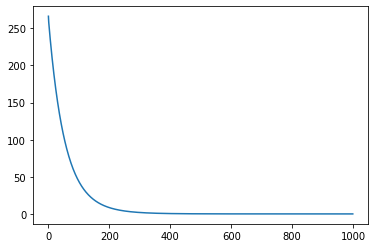

In [357]:
plt.plot(iterError_gd)

## Stochastic Gradient Descent

In [359]:
w_sgd = rng.random(p)
learning_rate_sgd = 0.05
epochs_sgd = 10
iterError_sgd = np.zeros(epochs_sgd*y.shape[0])

for i in range(1, epochs_sgd+1):
    for j in range(y.shape[0]):
        iterError_sgd[i*j] = (y - X@w_sgd).T @ (y - X@w_sgd)
        x_iter = X[j] # random sample of X
        y_iter = y[j] # random sample of Y
        error_diff_sgd = -(y_iter - w_sgd.T*x_iter)*x_iter # derivative of error
        w_sgd -= learning_rate_sgd * error_diff_sgd # sgd update

y_sgd = X @ w_sgd

In [361]:
# plt.plot(y_sgd, X, color='red')
# plt.scatter(y, X)

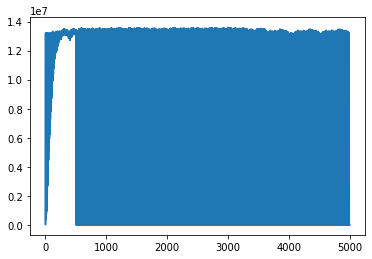

In [363]:
plt.plot(iterError_sgd)

# Task 2

In [365]:
w_rls = np.zeros((p, 1))
lambda_rls = 0.99
P = np.identity(p)
iterError_rls = np.zeros(y.shape[0])

for i, (x_n, y_n) in enumerate(zip(X, y)):
    x_n = x_n.reshape(-1, 1)

    error = y_n - x_n.T @ w_rls
    k_n = P @ x_n / (lambda_rls + x_n.T @ P @ x_n)
    P = (P - k_n @ x_n.T @ P) / lambda_rls
    w_rls += k_n * error
    iterError_rls[i] = (y_n - x_n.T @ w_rls)**2

y_rls = X @ w_rls

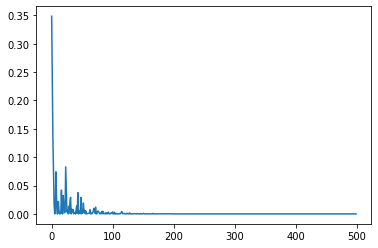

In [367]:
plt.plot(iterError_rls)

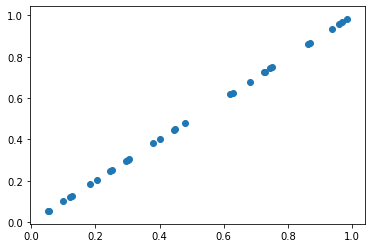

In [368]:
plt.scatter(w, w_rls)

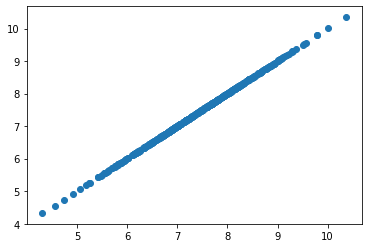

In [369]:
plt.scatter(y, y_rls)

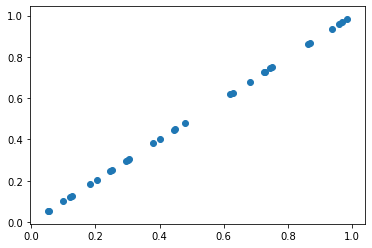

In [370]:
plt.scatter(w, w_closed)